In [1]:
import paper
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.request
import warnings
warnings.filterwarnings("ignore")

/opt/homebrew/Caskroom/miniforge/base/envs/mlep-w1-lab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Simple Dataset training and inference

## Dataset loading and preprocessing

In [3]:
# Loads a simple 2-d dataset
df = pd.read_csv('./data/simple.csv')
df.head()

,x_axis,y_axis,class
0,19.954786,-6.092677,1
1,20.850880,8.201559,1
2,19.628681,-7.373657,1
3,18.889160,-8.513841,1
4,18.441503,-8.971706,1


<Axes: >

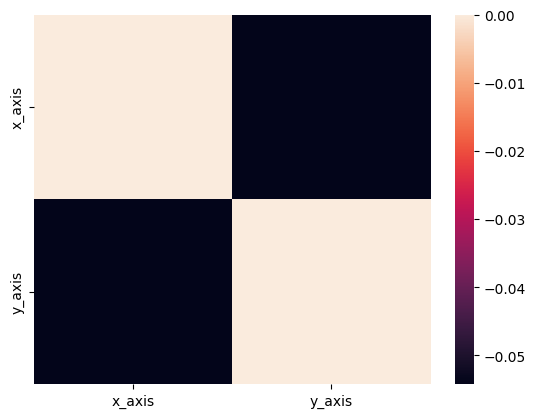

In [25]:
# Showing the correlation difference between the features of the inlier and the outlier sets
df_train = df.loc[df['class'] == 1].drop(['class'], axis=1)
df_shift = df.loc[df['class'] == 0].drop(['class'], axis=1)
full_corr = df_train.corr() - df_shift.corr()
sns.heatmap(full_corr)

In [8]:
print(df_train.shape, df_shift.shape)

(10000, 2) (200, 2)


## Training using the ADDML model

In [10]:
model = paper.OCML(prediction_head = "knn",
                   knn_method = "largest",
                   n_neighbors = 5,
                   metric_dim = 10,
                   num_epochs = 1000,
                   lr = 0.001,
                   weight_decay = 0,
                   val_size = 0.2,
                   mini_batch_size = 512,
                   patience = 0,
                   num_hidden_neurons = 128,
                   num_hidden_neurons2 = 128,
                   device = 'cpu',
                   normal_ratio = 0.8,
                   anomaly_ratio = None,
                   easy_ratio = 0.5,
                   hard_ratio = 0.5,
                   output_dimension = 14)

In [11]:
model.fit(df_train.to_numpy())

torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([130816]) torch.Size([65408])
torch.Size([32385]) torch.Size([16192])
torch.Size([1999000]) torch.Size([999500])


0.4155

In [22]:
# Inferencing the model over both datasets
results_train = model.decision_function(df_train.to_numpy())
results_test = model.decision_function(df_shift.to_numpy())

In [23]:
# Correcting the arrays for trained results and test results by removing top and bottom 2.5%
n = int(0.025 * len(results_train))
arr_trained = np.sort(results_train)
arr_trained = arr_trained[n:-n]

n = int(0.025 * len(results_test))
arr_tested = np.sort(results_test)
arr_tested = arr_tested[n:-n]

In [24]:
pd.DataFrame({"train_set": [np.mean(arr_trained)], "shifted_set": [np.mean(arr_tested)]}).head()

,train_set,shifted_set
0,0.000015,0.106418


As you can see, the distance to the outlier distribution data points is way bigger than the one to the inlier distribution data points.